In [1]:
import porespy as ps
import time
import matplotlib.pyplot as plt

The cylinders_porosity function works by estimating the number of cylinders needed to be inserted into the domain by estimating cylinder length, and exploiting the fact that, when inserting any potentially overlapping objects randomly into a volume v_total (which has units of pixels and is equal to dimx x dimy x dimz, for example), such that the total volume of objects added to the volume is v_added (and includes any volume that was inserted but overlapped with already occupied space), the resulting porosity will be equal to exp(-v_added/v_total).

After intially estimating the cylinder number and inserting a small fraction of the estimated number, the true cylinder volume is calculated, the estimate refined, and a larger fraction of cylinderss inserted. This is repeated a number of times according to the 'iterations' argument, yielding an image with a porosity close to the goal.

This first example shows that the output images are similar to the output of generators.cylinders for an image with the same number of cylinders, and that the goal porosity is reached.

218.0 fibers were added to reach the target porosity.
Output porosity is 0.796635.


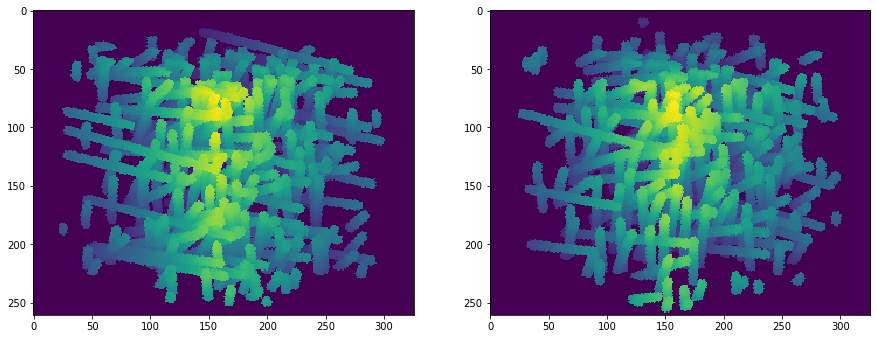

In [2]:
dim = 200
dims = [dim, dim,dim]
rcyl = 4
phi_max = 0
theta_max = 90
length = None
iterations = 3
return_fiber_number = True

im_porocyl,n_fibers = ps.generators.cylinders_porosity(dims,rcyl,0.8,phi_max,theta_max,length,iterations,return_fiber_number)

print('Output porosity is {}.'.format(str(ps.metrics.porosity(im_porocyl))))

im_cyl              = ps.generators.cylinders(dim,rcyl,n_fibers,phi_max,theta_max,length)
three_d1 = ps.visualization.show_3D(im_porocyl)
three_d2 = ps.visualization.show_3D(im_cyl)

fig, ax = plt.subplots(1, 2, figsize=[15, 15])
ax[0].imshow(three_d1)
ax[1].imshow(three_d2)


This next block shows that the time penalty over inserting the same number of fibers using generators.cylinders is about 2x, and the time penalty ratio increases with requested porosity, when image generation is faster anyway.

2415.0 fibers were added to reach the target porosity.
869.0 fibers were added to reach the target porosity.
207.0 fibers were added to reach the target porosity.
47.0 fibers were added to reach the target porosity.


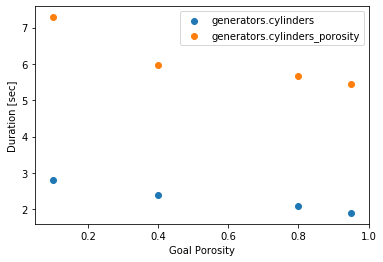

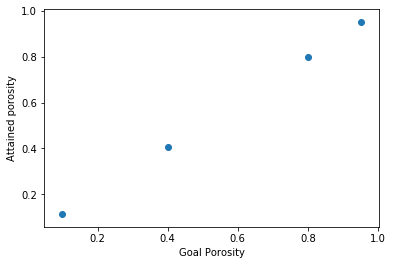

In [3]:
goal_poros = [0.1,0.4,0.8,0.95]
act_poros = []
time_ratios = []
times_porocyl = []
times_cyl = []

for goal_poro in goal_poros:

    porocyl_start_time = time.time()
    im_porocyl, n_fibers = ps.generators.cylinders_porosity(dims,rcyl,goal_poro,phi_max,theta_max,length,iterations,return_fiber_number)
    porocyl_duration = time.time()-porocyl_start_time
    times_porocyl.append(porocyl_duration)
    act_poros.append(ps.metrics.porosity(im_porocyl))
    
    cyl_start_time = time.time()
    im_cyl               = ps.generators.cylinders(dim,rcyl,n_fibers,phi_max,theta_max,length)
    cyl_duration = time.time()-cyl_start_time
    times_cyl.append(cyl_duration)

    time_ratio = porocyl_duration/cyl_duration
    time_ratios.append(time_ratio)

plt.scatter(goal_poros,times_cyl,label='generators.cylinders')
plt.scatter(goal_poros,times_porocyl,label='generators.cylinders_porosity')
plt.xlabel('Goal Porosity')
plt.ylabel('Duration [sec]')
plt.legend()
plt.show()

plt.scatter(goal_poros,act_poros)
plt.xlabel('Goal Porosity')
plt.ylabel('Attained porosity')
plt.show()

Lastly, this block shows that more iterations improves proximity to goal porosity.

In [4]:

three_iter_poros = []
six_iter_poros = []
for i in range(2):
    im_porocyl = ps.generators.cylinders_porosity(dims,rcyl,0.5,phi_max,theta_max,length,3,False)
    three_iter_poros.append(ps.metrics.porosity(im_porocyl))
    im_porocyl = ps.generators.cylinders_porosity(dims,rcyl,0.5,phi_max,theta_max,length,6,False)
    six_iter_poros.append(ps.metrics.porosity(im_porocyl))
print(three_iter_poros)
print(six_iter_poros)

662.0 fibers were added to reach the target porosity.
661.0 fibers were added to reach the target porosity.
679.0 fibers were added to reach the target porosity.
681.0 fibers were added to reach the target porosity.
[0.503886375, 0.503655625]
[0.4997055, 0.499613]
